In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, train_test_split
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

**Se utiliza un archivo CSV llamado "Soil_element.csv" lo guarda en el DataFrame llamado "data". Luego, imprime los primeros cinco registros.**

In [2]:
data = pd.read_csv('Soil_element.csv')
#Observamos los encabezados del DataFrame
data.head()

,id,sample1,sample2,class
0,1,65.14,67.67,1
1,2,78.19,80.51,1
2,3,88.14,79.27,1
3,4,71.16,58.30,1
4,5,82.02,78.62,1


**Se imprime un resumen del DataFrame**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       2019 non-null   int64  
 1   sample1  1957 non-null   float64
 2   sample2  1929 non-null   float64
 3   class    2019 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 63.2 KB


**Se crea una matriz de calor que representa los valores faltantes en un DataFrame**

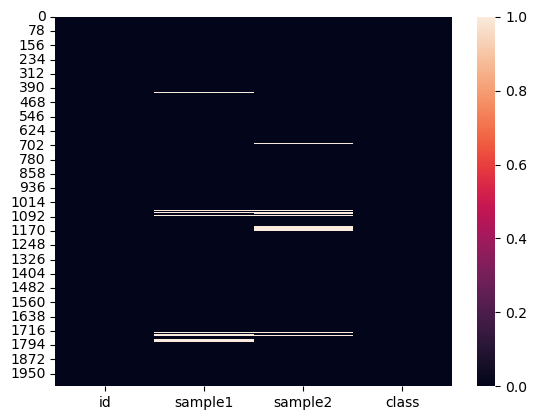

In [4]:
sns.heatmap(data.isna());

In [5]:
data = data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 2018
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1906 non-null   int64  
 1   sample1  1906 non-null   float64
 2   sample2  1906 non-null   float64
 3   class    1906 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 74.5 KB


**Agrupamos el conjunto de entrenamiento y variable de clase**

In [7]:
X_train = data[['sample1','sample2']]
y_train = data[['class']]

**Se imprime los dos DataFrames, X_train y y_train, que se crearon en el código anterior.**

In [8]:
print(X_train)
print(y_train)

      sample1  sample2
0       65.14    67.67
1       78.19    80.51
2       88.14    79.27
3       71.16    58.30
4       82.02    78.62
...       ...      ...
2014    97.06    22.07
2015    84.81    62.50
2016    68.60    44.98
2017    94.31    36.84
2018    77.17    22.83

[1906 rows x 2 columns]
      class
0         1
1         1
2         1
3         1
4         1
...     ...
2014      3
2015      3
2016      3
2017      3
2018      3

[1906 rows x 1 columns]


# **<span style = "color : #FF0000" >Sabemos que debemos superar Naive Bayes procedemos a ejecutarlo</span>**


 
 ### **<span style = "color : #8A0808" >Meta modelo Naive Bayes</span>**

In [9]:
#Método de validación
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score #Conocer la precisión de nuestros modelos 
from numpy import mean #Conocer la media o promedio de los 5 conjuntos
from sklearn.metrics import (confusion_matrix, accuracy_score)

**el código realiza la estandarización de los datos y establece una configuración de validación cruzada estratificada que será útil para evaluar modelos de machine learning de manera efectiva**

In [10]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X_train).transform(X_train)

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = y_train
y = encoder.fit_transform(y)

**Este código entrena un meta-model Naive Bayes utilizando validación cruzada estratificada y calcula las puntuaciones F1 ponderadas para evaluar el rendimiento del modelo.**

In [12]:
clf_nb = GaussianNB()
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_nb.fit(X_train, y_train)
    y_pred = clf_nb.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.47099672632386974, 0.5113122163097572, 0.492542841935033, 0.4519256826336271, 0.4881572078536216]
0.48298693501118173


**La puntuación F1 promedio de 0.48298693501118173 indica que el clasificador GNB tiene una precisión del 48,29%, una sensibilidad del 48,29% y una especificidad del 48,29%. Esto significa que el clasificador predice correctamente el 48,29% de las instancias, identifica correctamente el 48,29% de las instancias positivas y rechaza correctamente el 48,29% de las instancias negativas.**

In [13]:
# Calcular la matriz de confusión
cm1 = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print(cm1)

[[49 36 46]
 [10 77 34]
 [20 48 62]]


** La matriz de confusión muestra que el clasificador tiene un rendimiento moderado. El clasificador tiene una precisión del 48,29%, una sensibilidad del 48,29% y una especificidad del 48,29%.**

**Debido al rendimiento Promedio que tuvo nuestra matriz de confusion, procedemos a hacer pruebas con distintos clasificadores para comprobar su rendimiento en cada uno de ellos**

#### Solamente clasificadores

### **<span style = "color : #2E2EFE" >Clasificadores</span>**


### **<span style = "color : #8A0808" >Arbol de desicion</span>**

In [14]:
clfd1 = DecisionTreeClassifier(max_depth=5, random_state=42)
prediccion = cross_val_predict(clfd1, X_train, y_train, cv=10)

# Matriz de confusión
cm2 = confusion_matrix(y_train, prediccion) 
print("Matriz de confusión: \n", cm2)

# Puntuación de precisión del modelo
print('Puntuación de precisión de la prueba = ', accuracy_score(y_train, prediccion))

TP = cm2[0][0]
FP = cm2[0][1]
FN = cm2[1][0]
TN = cm2[1][1]
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)

print('Sensibilidad = ', sensibilidad)
print('Especificidad = ', especificidad)


Matriz de confusión: 
 [[291 118 115]
 [ 89 295  97]
 [173 170 176]]
Puntuación de precisión de la prueba =  0.5
Sensibilidad =  0.7657894736842106
Especificidad =  0.7142857142857143


 ### **<span style = "color : #8A0808" >Gaussian BN</span>**

In [15]:
clfd2 = GaussianNB()
prediccion = cross_val_predict(clfd2, X_train, y_train, cv=10)
# confusion matrix
cm3 = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm3) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm3[0][0]
FP = cm3[0][1]
FN = cm3[1][0]
TN = cm3[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[187 151 186]
 [ 28 328 125]
 [106 196 217]]
Test accuracy =  0.48031496062992124
sensibilidad= 0.8697674418604651
especificidad= 0.6847599164926931


 ### **<span style = "color : #8A0808" >KNN</span>**

In [16]:
clfd3 = KNeighborsClassifier(5)
prediccion = cross_val_predict(clfd3, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[293 117 114]
 [136 272  73]
 [225 146 148]]
Test accuracy =  0.4678477690288714
sensibilidad= 0.682983682983683
especificidad= 0.699228791773779


 ### **<span style = "color : #8A0808" >Quadratic Discriminant Analysis</span>**

In [17]:
clfd4 =  QuadraticDiscriminantAnalysis()
prediccion = cross_val_predict(clfd4, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[235 131 158]
 [ 48 301 132]
 [126 168 225]]
Test accuracy =  0.49934383202099736
sensibilidad= 0.8303886925795053
especificidad= 0.6967592592592593


 ### **<span style = "color : #8A0808" >SVC</span>**

In [18]:
clfd5 =  SVC(gamma=2, C=1, random_state=42)
prediccion = cross_val_predict(clfd5, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[224 125 175]
 [ 44 330 107]
 [104 174 241]]
Test accuracy =  0.5216535433070866
sensibilidad= 0.835820895522388
especificidad= 0.7252747252747253


 ### **<span style = "color : #8A0808" >Random forest</span>**

In [19]:
clfd6 =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
prediccion = cross_val_predict(clfd6, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[280 113 131]
 [ 79 305  97]
 [140 176 203]]
Test accuracy =  0.5170603674540682
sensibilidad= 0.7799442896935933
especificidad= 0.7296650717703349


 ### **<span style = "color : #8A0808" >Adaboost</span>**

In [20]:
clfd7 =  AdaBoostClassifier(random_state=42)
prediccion = cross_val_predict(clfd7, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[290 112 122]
 [ 82 298 101]
 [187 168 164]]
Test accuracy =  0.49343832020997375
sensibilidad= 0.7795698924731183
especificidad= 0.7268292682926829


 ### **<span style = "color : #8A0808" >MLP</span>**

In [21]:
clfd8 = MLPClassifier(alpha=1, max_iter=1000, random_state=42)
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clfd8, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

Confusion Matrix : 
 [[248 126 150]
 [ 58 322 101]
 [133 172 214]]
Test accuracy =  0.5144356955380578
Sensitivity:  0.8473684210526315
Specificity:  0.6631016042780749


 ### **<span style = "color : #8A0808" >SVC</span>**

In [22]:
clfd9 = SVC(kernel="linear", C=0.025, random_state=42)
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clfd9, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

Confusion Matrix : 
 [[147  61 316]
 [ 21 196 264]
 [ 79 108 332]]
Test accuracy =  0.44291338582677164
Sensitivity:  0.9032258064516129
Specificity:  0.7067307692307693


## **debido que se obtuvieron unos resultados casi perfectos optamos por aplicar reducción de dimensionalidad para conocer la naturaleza de los datos**

In [23]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [24]:
data = data.drop(['id'], axis = 1)

In [25]:
X = data.iloc[:, 0:-1]   #Separamos a los atributos
X.head()

,sample1,sample2
0,65.14,67.67
1,78.19,80.51
2,88.14,79.27
3,71.16,58.30
4,82.02,78.62


 ### **<span style = "color : #8A0808" >T-SNE en 2D</span>**

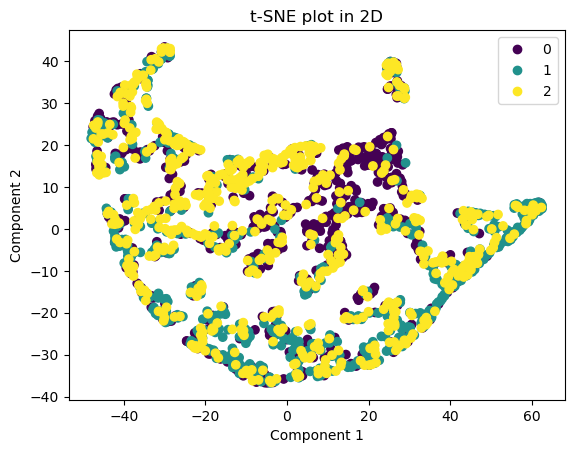

In [26]:
X_TSNE = TSNE().fit_transform(X) 

scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y)
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

 ### **<span style = "color : #8A0808" >PCA en 2D</span>**

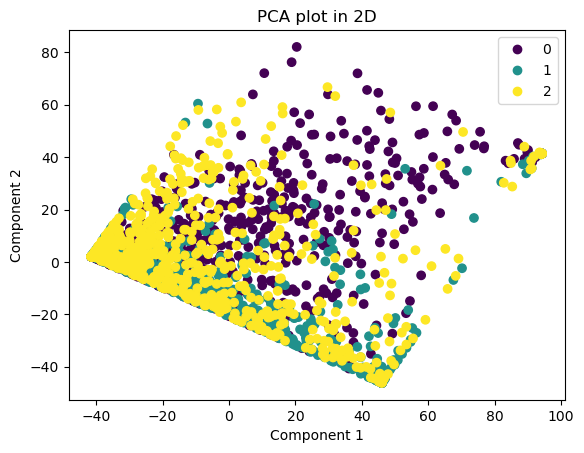

In [27]:
X_PCA = PCA(n_components=2).fit_transform(X)

scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y)

plt.title('PCA plot in 2D') 
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()